In [2]:
# Evaluamos el modelo con los datos de test

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical

In [2]:
# Función que nos retorna las clases del df introducido como si fueran 10 submuestras por cada señal
def aument_dataframe_clases(df) -> list:
    data = []
    for clase in df['Class']:
        for i in range(0, 10):
            data.append(clase)

    df = pd.DataFrame(data, columns =['Class'], dtype = str)
    
    return df['Class']

In [3]:
# Cargamos la matriz de la iteración que corresponda
def load_test():
    
    path = 'Clasificaciones/test.csv'
    
    df_test = pd.read_csv(path)
    
    X_test = np.load("Variables/matrix_test.npy") # cargar la matriz guardada
    X_test = X_test.reshape(len(df_test)*10, 100, 121)
    
    y_test = aument_dataframe_clases(df_test) # cargar la matriz guardada y quedarse con la columna de clase
    y_test[y_test == 'No jamming'] = 0
    y_test[y_test == 'Jamming'] = 1
    y_test = to_categorical(y_test)
    
    display(y_test[:,0].shape)
    
    return X_test, y_test

In [4]:
new_model = load_model('Nuevos_modelos/adadelta_model_lr_0.001_final')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# evaluate the model
cvscores = []
X_test, y_test = load_test()

X_test = np.expand_dims(X_test, axis=3)
display(X_test.shape)
scores = new_model.evaluate(X_test, y_test, verbose=1)
print('adadelta_model_lr_0.001:')
print("%s: %.2f%%\n" % (new_model.metrics_names[1], scores[1]*100))

(320,)

(320, 100, 121, 1)

320/320 [==============================] - 1s 2ms/sample - loss: 0.1400 - acc: 0.9547
adadelta_model_lr_0.001:
acc: 95.47%



In [6]:
cvscores = []
X_test, y_test = load_test()

X_test = np.expand_dims(X_test, axis=3)

scores = new_model.predict(X_test)

y_pred = np.argmax(scores, axis=1)
y_test = np.argmax(y_test, axis=1)

print(y_pred)
print(y_test)

(320,)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1

[[150  10]
 [  3 157]]


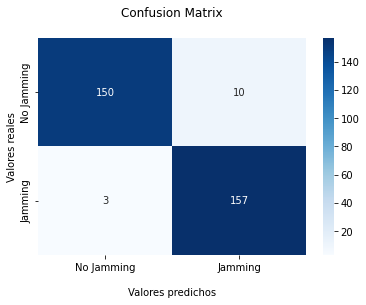

In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales');

ax.xaxis.set_ticklabels(['No Jamming','Jamming'])
ax.yaxis.set_ticklabels(['No Jamming','Jamming'])

plt.show()

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       160
           1       0.94      0.98      0.96       160

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320



In [9]:
# Cargamos la matriz de la iteración que corresponda
def load_finetuning_test():
    
    path = 'Clasificaciones/test.csv'
    
    df_test = pd.read_csv(path)
    
    X_test = np.load("Variables/matrix_test.npy") # cargar la matriz guardada
    X_test = X_test.reshape(len(df_test)*10, 100, 121)
    
    y_test = aument_dataframe_clases(df_test) # cargar la matriz guardada y quedarse con la columna de clase
    y_test[y_test == 'No jamming'] = 0
    y_test[y_test == 'Jamming'] = 1
    y_test = to_categorical(y_test)
    
    return X_test, y_test

In [10]:
vgg_model = load_model('Nuevos_modelos/finetuning_adadelta_model_lr_0.01_final')

# evaluate the model
cvscores = []
X_test, y_test = load_finetuning_test()

X_test = np.expand_dims(X_test, axis=3)
X_test = np.tile(X_test, 3)

scores = vgg_model.evaluate(X_test, y_test, verbose=1)
print('vgg_adadelta_model_lr_0.01:')
print("%s: %.2f%%\n" % (vgg_model.metrics_names[1], scores[1]*100))

320/320 [==============================] - 5s 16ms/sample - loss: 0.2296 - acc: 0.9563
vgg_adadelta_model_lr_0.01:
acc: 95.63%



In [11]:
cvscores = []
X_test, y_test = load_test()

X_test = np.expand_dims(X_test, axis=3)
X_test = np.tile(X_test, 3)

scores = vgg_model.predict(X_test)

y_pred = np.argmax(scores, axis=1)
y_test = np.argmax(y_test, axis=1)

print(y_pred)
print(y_test)

(320,)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1

[[149  11]
 [  2 158]]


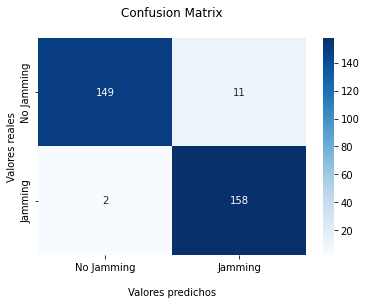

In [12]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales');

ax.xaxis.set_ticklabels(['No Jamming','Jamming'])
ax.yaxis.set_ticklabels(['No Jamming','Jamming'])

plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       160
           1       0.93      0.99      0.96       160

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320

